In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
def plot_all(path, file, title):

    os.chdir( path)
    crl_data = xr.open_dataset( file)

    
    # temperature 
    fig = plt.figure( figsize=(20, 15))
    color_map = plt.cm.get_cmap( "RdYlBu").reversed()

    index1 = 0
    index2 = len( crl_data.Lon) 

    plt.subplot(511)
    lon = crl_data.Lon[index1:index2]
    temp = crl_data.T[index1:index2, :].where( crl_data.T[index1:index2, :].values < 50).transpose()

    plt.title( title)

    plt.pcolormesh( crl_data.time[index1:index2], - crl_data.H, temp, cmap = color_map ) 
    plt.ylabel( 'Height (km)')
    # plt.xlabel( 'Longitude (degrees)')
    # plt.xlim( [ crl_data.Lon[index1], crl_data.Lon[index2] ] )
    plt.grid( 'on')

    ax = plt.gca()
    ax.set_facecolor('k')

    plt.colorbar(label="Temperature ( C)")


    # wvmr

    plt.subplot(512)

    step1 = crl_data.WVMR.where( crl_data.WVMR.values != 0)
    step2 = step1.where( step1.values < 20)

    crl_lon = crl_data.Lon[index1:index2]
    crl_lon_wvmr = step2[index1:index2, :].transpose()

    plt.pcolormesh( crl_data.time[index1:index2], - crl_data.H, crl_lon_wvmr )  
    plt.ylabel( 'Height (km)')
    # plt.xlabel( 'Longitude ( degrees)')
    # plt.xlim( [ crl_data.Lon[index1], crl_data.Lon[index2] ] )
    plt.grid( 'on')

    ax = plt.gca()
    ax.set_facecolor('k')

    plt.colorbar(label="WVMR ( g/kg)")



    # lsr

    plt.subplot(513)

    crl_lon = crl_data.Lon[index1:index2]

    step1 = crl_data.LSR[index1:index2, :].where( crl_data.LSR[index1:index2].values < 10).transpose() 
    crl_lon_lsr = step1.where( step1.values > .1) 

    plt.pcolormesh( crl_data.time[index1:index2], - crl_data.H, crl_lon_lsr )  
    plt.ylabel( 'Height (km)')
    # plt.xlabel( 'Longitude ( degrees)')
    # plt.xlim( [ crl_data.Lon[index1], crl_data.Lon[index2] ] )
    plt.grid( 'on')

    ax = plt.gca()
    ax.set_facecolor('k')

    plt.colorbar(label="LSR")



    # power ch 1

    plt.subplot(514)

    crl_lon = crl_data.Lon[index1:index2]

    step1 = 10 * np.log10( crl_data.P_ch1 )
    step2 = step1.where( step1.values > -30)
    crl_lon_pch1 = step2[index1:index2, :].transpose()

    # step1 = crl_data.LSR[index1:index2, :].where( crl_data.LSR[index1:index2].values < 10).transpose()

    plt.pcolormesh( crl_data.time[index1:index2], - crl_data.H, crl_lon_pch1 )  
    plt.ylabel( 'Height (km)')
    # plt.xlabel( 'Longitude ( degrees)')
    # plt.xlim( [ crl_data.Lon[index1], crl_data.Lon[index2] ] )
    plt.grid( 'on')

    ax = plt.gca()
    ax.set_facecolor('k')

    plt.colorbar(label="Backscattered Chl 1 Power ( dBz)")



    # relative humidity

    lon = crl_data.Lon[index1:index2]

    epsilon = .622
    e_0 = 6.112 # hPa
    b = 17.67
    T_1 = 273.15 # K
    T_2 = 29.65 # K

    # calculate wvmr
    step1 = crl_data.WVMR.where( crl_data.WVMR.values != 0)
    step2 = step1.where( step1.values < 20)
    wvmr = step2[index1:index2, :].transpose()

    # calculate temperature (K)
    temp = crl_data.T[index1:index2, :].where( crl_data.T[index1:index2, :].values < 50).transpose() + 273

    # height -> pressure
    # no negative sign in exp() because heights are already negative
    scale_ht = 7.5 # km, just an estimate
    pressure = 1013.3 * np.exp( crl_data.H / scale_ht) # hPa

    # find saturation vapor pressure
    e_s = e_0 * np.exp(  ( b * ( temp - T_1) ) / (temp - T_2) )

    # find relative humidity!
    saturation_wvmr = 1000 * (epsilon * e_s ) / ( pressure - e_s) # multiply by 1000 to get to g/kg like wvmr (above)
    rh = 100 * wvmr / saturation_wvmr

    # Plot RH!

    plt.subplot(515)
    plt.pcolormesh( crl_data.time[index1:index2], crl_data.H,  rh.where( rh.values < 100)) #- crl_data.H, crl_lat_rh )  
    plt.ylabel( 'Height (km)')
    plt.xlabel( 'Time of Flight ( UTC)')
    # plt.xlim( [ crl_data.time[index1], crl_data.Lon[index2] ] )
    plt.grid( 'on')
    plt.gca().invert_yaxis()
    ax = plt.gca()
    ax.set_facecolor('k')

    plt.colorbar(label="RH (%)")


In [4]:
# view + choose data

crl_path = "/Users/etmu9498/Desktop/research/CRL_data/2021"

file_names = []
for (dirpath, dirnames, file) in os.walk( crl_path):
    file_names.extend(file)
    break

for number in range( len( file_names)):
    print( str( number) + ") " + file_names[ number])

0) P3_20210811H1_200000-224759.cdf
1) P3_20210812H1_095513-125927.cdf
2) P3_20210812H2_212248-235510.cdf
3) P3_20210813H1_091801-113558.cdf
4) P3_20210816H1_085245-123459.cdf
5) P3_20210816H1_090000-102359.cdf
6) P3_20210817H1_094204-132058.cdf
7) P3_20210818H1_211425-244159.cdf
8) P3_20210819H1_213003-244159.cdf
9) P3_20210820H1_212402-245958.cdf
10) P3_20210821H2_213903-225658.cdf
11) P3_20210821H2_213903-262058.cdf
12) P3_20210827H1_203112-275220.cdf
13) P3_20210828H1_200115-221321.cdf
14) P3_20210829H1_171201-223719.cdf
15) P3_20210925H1_211201-243558.cdf
16) P3_20210926H1_220900-255058.cdf
17) P3_20210927H1_213003-253558.cdf
18) P3_20210929H2_211201-261159.cdf


C:\Users\etmu9498\AppData\Local\Temp/ipykernel_7692/3046104868.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh( crl_data.time[index1:index2], - crl_data.H, temp, cmap = color_map )
C:\Users\etmu9498\AppData\Local\Temp/ipykernel_7692/3046104868.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh( crl_data.time[index1:index2], - crl_data.H, crl_lon_wvmr )
C:\Users\etmu9498\AppData\Local\Temp/ipykernel_7692/3046104868.py:64: 

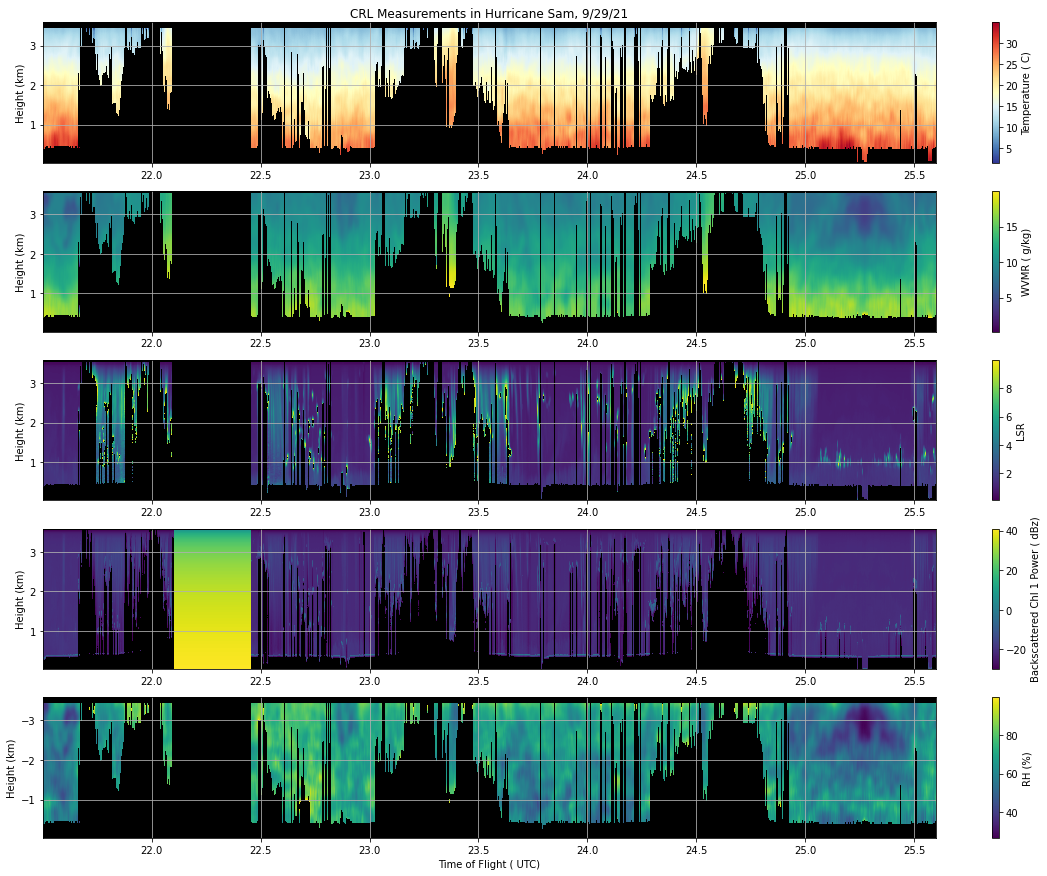

In [5]:
current_title = "CRL Measurements in Hurricane Sam, 9/29/21"
plot_all(crl_path, file_names[17], current_title)


# how does the data look?

# multi line comment -> control +/

# 8/11 to 8/13: tropical storm fred
#     high attenuation for 8/12 but mostly good!
# 8/16 to 8/19: hurricane grace
#     also looks mostly good!
# 8/20 to 8/21: hurricane henri
#     good with a tiny bit of data clipping on 8/20
# 8/27 to 8/29: hurricane ida
#     minor wvmr and T clipping on 8/27, same for 8/28, big swaths missing for 8/29
# 9/25 to 9/29: hurricane sam
#     9/25 is basically unusable, 9/26 looks fantastic, a medium clipped section on 9/27, 
#     lots of clipping on 9/29 but the available data looks really great!
